In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

Text(0, 0.5, 'Общее количество новорожденных в течение года')

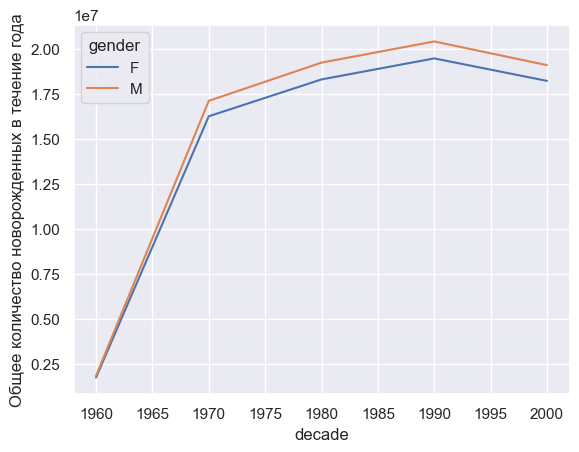

In [83]:
births = pd.read_csv('births.csv')
births['decade'] = births['year'] // 10 * 10
sns.set()
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum').plot()
plt.ylabel('Общее количество новорожденных в течение года')

In [88]:
q = np.percentile(births['births'], [25, 50, 70])
mu = q[1]
sig = 0.74 * (q[2] - q[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

/var/folders/df/_1rvc2nn35j2006ypzgcn9j80000gn/T/ipykernel_1567/1066617181.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([0, 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


Text(0, 0.5, 'среднее количество новорожденных')

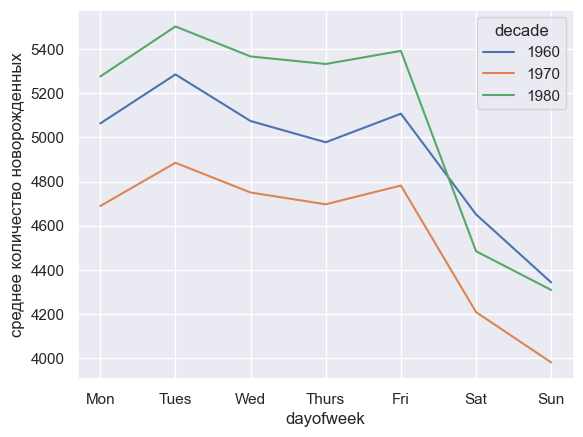

In [94]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels([0, 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('среднее количество новорожденных')

In [102]:
by_date = births.pivot_table('births', [births.index.month, births.index.day])
by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [103]:
by_date.index = [pd.datetime(2012, month, day) for month, day in by_date.index]
by_date

/var/folders/df/_1rvc2nn35j2006ypzgcn9j80000gn/T/ipykernel_1567/1082647932.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  by_date.index = [pd.datetime(2012, month, day) for month, day in by_date.index]


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


<AxesSubplot:>

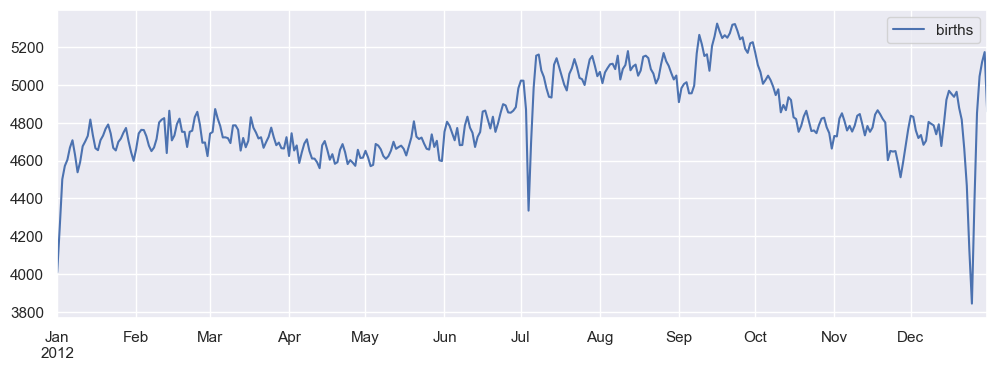

In [104]:
f, a = plt.subplots(figsize=(12, 4))
by_date.plot(ax=a)